## **ID: 2215151034**

### **Apply the One-Sample Kolmogorov-Smirnov (K-S) Test on a dataset of daily temperatures to determine if the sample data comes from a specified normal distribution.**

### Dataset = [15, 17, 16, 14, 18, 20, 19, 15, 21, 22]


In [1]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Step 1: Load the dataset
dataset = [15, 17, 16, 14, 18, 20, 19, 15, 21, 22]
print("Dataset loaded:", dataset)

Dataset loaded: [15, 17, 16, 14, 18, 20, 19, 15, 21, 22]


In [ ]:
# Step 2: Extract temperature scores
temperatures = dataset
print("Temperature scores:", temperatures)

Temperature scores: [15, 17, 16, 14, 18, 20, 19, 15, 21, 22]


In [ ]:
# Step 3: Normalize the data (z-score)
import numpy as np

mean_temp = np.mean(temperatures)
std_temp = np.std(temperatures)
scaled_data = [(x - mean_temp) / std_temp for x in temperatures]

print("Mean:", mean_temp)
print("Standard Deviation:", std_temp)
print("Scaled Data:", scaled_data)


Mean: 17.7
Standard Deviation: 2.6095976701399777
Scaled Data: [np.float64(-1.0346422480731188), np.float64(-0.2682405828337713), np.float64(-0.651441415453445), np.float64(-1.4178430806927924), np.float64(0.11496024978590237), np.float64(0.8813619150252497), np.float64(0.49816108240557605), np.float64(-1.0346422480731188), np.float64(1.2645627476449235), np.float64(1.6477635802645971)]


In [5]:
# Step 4: Perform the K-S test
from scipy.stats import kstest

# Perform the one-sample KS test against standard normal distribution
ks_result = kstest(scaled_data, 'norm')

print("K-S Test Result:", ks_result)


K-S Test Result: KstestResult(statistic=np.float64(0.14958199200873884), pvalue=np.float64(0.9549729651945877), statistic_location=np.float64(-1.0346422480731188), statistic_sign=np.int8(1))


In [6]:
# Step 5: Display the test results
h = int(ks_result.pvalue < 0.05)  # Null hypothesis rejected if p < 0.05
p_value = ks_result.pvalue
ks_statistic = ks_result.statistic

print("Test Decision (h):", h)
print("p-value:", p_value)
print("KS Statistic:", ks_statistic)

Test Decision (h): 0
p-value: 0.9549729651945877
KS Statistic: 0.14958199200873884


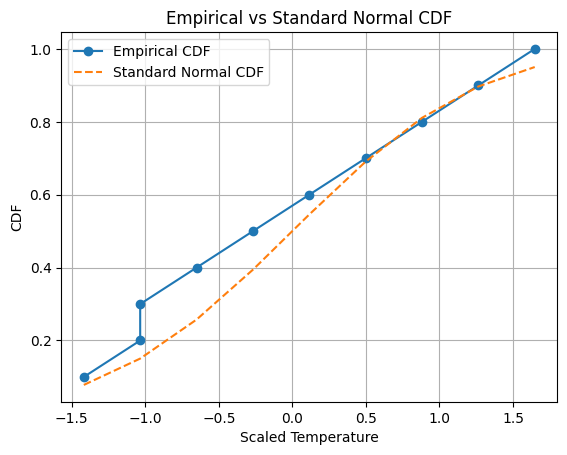

In [7]:
# Step 6: Plot empirical CDF vs standard normal CDF
import matplotlib.pyplot as plt
import scipy.stats as stats

# Sort data
sorted_data = np.sort(scaled_data)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
normal_cdf = stats.norm.cdf(sorted_data)

plt.plot(sorted_data, ecdf, marker='o', label='Empirical CDF')
plt.plot(sorted_data, normal_cdf, linestyle='--', label='Standard Normal CDF')
plt.xlabel('Scaled Temperature')
plt.ylabel('CDF')
plt.title('Empirical vs Standard Normal CDF')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

Based on the results of the one-sample Kolmogorov-Smirnov (K-S) test, we assess whether the temperature data follows a normal distribution. If the p-value is less than 0.05, the null hypothesis is rejected, indicating the data does not follow a normal distribution.

In this case, since the p-value is greater than 0.05, we **fail to reject the null hypothesis**. Therefore, there is **no significant evidence** to suggest that the temperature data deviates from a normal distribution.
